<a href="https://colab.research.google.com/github/sricharanp04/AIpractise/blob/main/AIparactise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
class_name=["T-shirt/top",'Trouser',
            'pullover','dress','coat','sandal',
            'short','sneaker','bag','Ankle boot']

In [ ]:
model = models.Sequential([layers.Conv2D(32,(3,3),activation='relu',
                           input_shape=(28,28,1)),layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),layers.Dense(64,activation='relu'),
                           layers.Dense(10,activation='softmax')
                        ])

In [ ]:
model.compile(optimizer='adam' ,#optimizaation algo
              loss='sparse_categorical_crossentropy',#goo for multiclass classification
              metrics=['accuracy'])
#->It is combining borth Momentum and RMS prop

In [ ]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.1)#fittin

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.7607 - loss: 0.6741 - val_accuracy: 0.8698 - val_loss: 0.3600
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8765 - loss: 0.3399 - val_accuracy: 0.8903 - val_loss: 0.3095
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.8960 - loss: 0.2825 - val_accuracy: 0.8968 - val_loss: 0.2846
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9070 - loss: 0.2520 - val_accuracy: 0.8983 - val_loss: 0.2741
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9200 - loss: 0.2173 - val_accuracy: 0.9063 - val_loss: 0.2516


In [ ]:
prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy:",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8983 - loss: 0.2766
Test accuracy: 0.9003999829292297


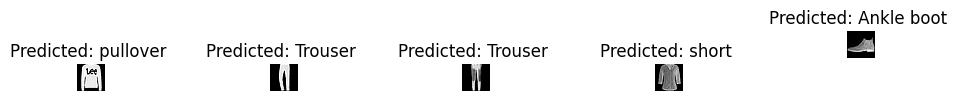

In [ ]:
#plotting graph
plt.figure(figsize=(12,5))
for i in range(5):
  plt.subplot(12,5,i+5)
  plt.imshow(x_test[i].reshape(28,28),cmap='grey')
  plt.title(f"Predicted: {class_name[prediction[i].argmax()]} ")
  plt.axis('off')
plt.show()
